# 1. State Problem

## 1.1 Problem and Pain point (ปัญหาและความสำคัญ)

    ในระบบแขนกลอุตสาหกรรม หรือระบบอัตโนมัติต่างๆ การที่ระบบจะหยิบจับหรือทำงานกับวัตถุได้นั้น ไม่เพียงแต่ต้องรู้ว่า 'วัตถุคืออะไร' แต่ยังต้องทราบ 'ตำแหน่งและทิศทางการวาง' ของวัตถุชิ้นนั้นอย่างแม่นยำในโลกแห่งความเป็นจริงด้วย ซึ่งโมเดลตรวจจับวัตถุโดยทั่วไปสามารถตีกรอบรอบวัตถุในภาพได้ แต่ไม่สามารถให้ข้อมูลพิกัดจริงที่จำเป็นสำหรับการทำงานของแขนกลได้ การพัฒนาระบบที่สามารถระบุตำแหน่งได้อย่างแม่นยำมักมีความซับซ้อนและต้องใช้เซ็นเซอร์ราคาแพง เช่น กล้อง 3 มิติ โครงการนี้จึงถูกพัฒนาขึ้นเพื่อแก้ปัญหานี้ โดยนำเสนอวิธีการที่ใช้เพียงกล้อง 2 มิติทั่วไป แต่ให้ความแม่นยำสูงและมีต้นทุนที่ต่ำกว่า
    
<div align="center">
  <img src="asset/robot_arm.jpg" alt="ตัวอย่าง Robot_arm industry" width="900"/>
</div>


## 1.2 Related work (งานวิจัย/แนวทางที่เกี่ยวข้อง)

    โดยทั่วไปแล้ว มีสองแนวทางหลักในการแก้ปัญหานี้ แนวทางแรกคือการใช้โมเดล Object Detection เช่น YOLO รุ่นมาตรฐาน ซึ่งสามารถตรวจจับและบอกได้ว่าวัตถุคืออะไรและอยู่ตำแหน่งไหนในภาพ (หน่วยเป็นพิกเซล) แต่ขาดความสามารถในการบอก 'ทิศทางการหมุน' ของวัตถุ และไม่สามารถแปลงเป็นพิกัดในโลกจริงได้ 
    
https://www.researchgate.net/publication/365053577_Oriented_Vehicle_Detection_in_Aerial_Images_Based_on_YOLOv4#pf4

https://github.com/ultralytics/ultralytics/issues/624

<div align="center">
  <img src="asset/yolo.png" alt="ตัวอย่าง yolo_vs_yoloOBB" width="400"/>
</div>

<div align="center">
  <img src="asset/yolo_OBB.png" alt="ตัวอย่าง yolo_vs_yoloOBB" width="400"/>
</div>

    ส่วนอีกแนวทางคือการใช้ Marker-based tracking เช่น ArUco เพียงอย่างเดียว ซึ่งสามารถให้พิกัดที่แม่นยำได้ แต่ระบบจะไม่รู้ว่าวัตถุนั้น 'คืออะไร' และต้องมีการนำ Marker ไปติดไว้บนวัตถุทุกชิ้นเสมอ

https://www.researchgate.net/figure/Picture-of-the-Aruco-markers-on-the-target-object-and-the-bottom-sliding-platform_fig4_391052985

<div align="center">
  <img src="asset/Aruco_research.png" alt="ตัวอย่าง ArUco" width="400"/>
</div>

## 1.3 Unique method (วิธีการที่เป็นเอกลักษณ์ของโครงการนี้)

    โครงการของเรานำเสนอวิธีการแบบผสมผสาน (Hybrid) ที่เป็นเอกลักษณ์ โดยการรวมจุดแข็งของสองเทคโนโลยีเข้าด้วยกัน คือ YOLOv8-OBB และ ArUco Marker
    
    เราใช้ YOLOv8-OBB (Oriented Bounding Box) ซึ่งเป็นโมเดลที่มีความสามารถสูงในการตรวจจับวัตถุและยังสามารถตรวจจับ 'ทิศทางการหมุน' ของวัตถุได้พร้อมกัน จากนั้นเราใช้ ArUco Marker เป็นจุดอ้างอิงหลักในพื้นที่ทำงานเพื่อสร้าง 'มุมมองเบิร์ดอายวิว' หรือ Perspective Transformation
    
    เมื่อนำสองสิ่งนี้มารวมกัน ระบบของเราจะสามารถแปลงตำแหน่งและองศาการหมุนของวัตถุที่ตรวจจับได้จากภาพ 2 มิติ ให้กลายเป็นพิกัดและทิศทางในโลกแห่งความเป็นจริงได้อย่างแม่นยำ ทำให้แขนกลสามารถเข้าไปหยิบจับวัตถุได้อย่างถูกต้อง วิธีการนี้ไม่เพียงแต่แม่นยำ แต่ยังใช้ฮาร์ดแวร์ที่ไม่ซับซ้อน ทำให้เป็นโซลูชันที่มีประสิทธิภาพและเข้าถึงง่าย

# 2. Data Preparation

## 2.1 Data Acquisition & Tooling Decisions (การรวบรวมข้อมูลและการตัดสินใจเลือกเครื่องมือ)

ชุดข้อมูลที่ใช้ในโครงการนี้ประกอบด้วยรูปภาพวัตถุ (ขวดและกระป๋อง) จำนวน 626 รูป ซึ่งเป็นภาพที่ ทีมงานถ่ายทำขึ้นเองทั้งหมด เพื่อควบคุมสภาพแวดล้อมและมุมมองของวัตถุให้ใกล้เคียงกับการใช้งานจริงมากที่สุด

หลังจากได้ข้อมูลภาพแล้ว ขั้นตอนที่สำคัญอย่างยิ่งคือการติดป้ายข้อมูล (Labeling) สำหรับโมเดล OBB (Oriented Bounding Box) ซึ่งต้องการความแม่นยำของ 'ทิศทางการหมุน' ของวัตถุ การเลือกเครื่องมือจึงเป็นปัจจัยสำคัญ

ในตอนแรก ได้ทำการสำรวจเครื่องมือยอดนิยมอย่าง Roboflow ซึ่งมีความสามารถในการทำ Labeling ที่หลากหลาย แต่เมื่อทดลองใช้งานสำหรับ OBB พบข้อจำกัดที่สำคัญคือ แม้จะสร้างป้ายข้อมูลแบบ Polygon ได้ แต่ Polygon ที่สร้างด้วยมืออาจไม่มีความสมมาตร หากเราใช้ Label ที่เป็น Polygon เบี้ยวๆ ไปเทรน จะเกิดความไม่สอดคล้องกันระหว่าง 'ข้อมูลจริง' (Ground Truth ที่เบี้ยว) กับ 'สิ่งที่โมเดลพยายามเรียนรู้' (สี่เหลี่ยมมุมฉากที่สมมาตร) ซึ่งอาจลดทอนประสิทธิภาพของโมเดลได้

ด้วยเหตุนี้ เราจึงตัดสินใจเลือกใช้ CVAT (Computer Vision Annotation Tool) ซึ่งเป็นเครื่องมือที่ตอบโจทย์ได้ดีกว่าโดยตรง เนื่องจาก
<div align="center">
  <img src="asset/CVAT_rotate_box.png" alt="ตัวอย่าง ArUco" width="400"/>
</div>
รองรับ Rotated Bounding Box โดยเฉพาะ: CVAT มีเครื่องมือสำหรับวาดกรอบสี่เหลี่ยมและหมุนองศาได้โดยตรง ทำให้ Label ที่ได้มีความสมมาตรและสอดคล้องกับสิ่งที่โมเดล OBB ต้องการเรียนรู้

Export ข้อมูลมุมองศาได้ สามารถส่งออกข้อมูลมุมองศา (rotation) ของแต่ละ Bounding Box ออกมาได้ ซึ่งเป็นข้อมูลสำคัญที่เราจะนำไปใช้คำนวณต่อในขั้นตอนถัดไป

ดังนั้น CVAT จึงเป็นเครื่องมือที่ถูกเลือกใช้ในโครงการนี้ และข้อมูลที่ได้จาก CVAT จะถูกนำไปเข้าสู่กระบวนการแปลงและจัดโครงสร้างด้วยสคริปต์ที่เราพัฒนาขึ้นเองโดยเฉพาะ


## 2.2: Automated Data Pipeline: From CVAT to YOLO OBB (กระบวนการแปลงข้อมูลอัตโนมัติ)

หลังจากได้ไฟล์ Annotation จาก CVAT แล้ว ข้อมูลยังไม่พร้อมสำหรับนำไปฝึกสอนโมเดลทันที เราจึงได้พัฒนา Custom Python Script ขึ้นมาเพื่อสร้างกระบวนการเตรียมข้อมูลอัตโนมัติ (Automation Pipeline) ทั้งหมด ซึ่งช่วยแก้ปัญหาความเข้ากันไม่ได้ของฟอร์แมตและจัดระเบียบชุดข้อมูลให้ถูกต้อง

กระบวนการทำงานของสคริปต์แบ่งออกเป็น 2 ขั้นตอนหลักดังนี้

### 1. Merge Annotations (การรวมข้อมูล Label)
ในกรณีที่มีผู้ช่วยติดป้ายข้อมูลหลายคน เราจะได้ไฟล์ XML Annotation ออกมาหลายไฟล์ สคริปต์ส่วนแรกจึงถูกออกแบบมาเพื่อ อ่านและรวมไฟล์ XML ทั้งหมดให้กลายเป็นไฟล์ Annotation หลักเพียงไฟล์เดียว ทำให้สามารถจัดการข้อมูลทั้งหมดได้ในครั้งเดียว

In [ ]:
# ระบุโฟลเดอร์ที่มีไฟล์ XML อยู่จะดึงทุกตัวมา merge กันทั้งหมด
# ใช้ '.' หมายถึงโฟลเดอร์ปัจจุบัน
folder_path = 'merge_xml_file' 

In [ ]:
import xml.etree.ElementTree as ET
import glob
import os

def merge_multiple_cvat_annotations(input_folder, output_file):
    """
    Merges all CVAT XML annotation files in a given folder.

    Args:
        input_folder (str): Path to the folder containing the XML files.
        output_file (str): Path to save the merged XML file.
    """
    # Find all XML files in the folder
    xml_files = glob.glob(os.path.join(input_folder, '*.xml'))
    
    # Exclude the potential output file from the input list to avoid merging it with itself
    if os.path.join(input_folder, output_file) in xml_files:
        xml_files.remove(os.path.join(input_folder, output_file))

    if not xml_files:
        print("No XML files found to merge.")
        return

    print(f"Found files to merge: {xml_files}")

    # Use the first file as the base
    base_tree = ET.parse(xml_files[0])
    base_root = base_tree.getroot()

    # Get the last image id from the first file
    last_id = -1
    images = base_root.findall('image')
    if images:
        last_id = max([int(img.get('id')) for img in images])

    # Loop through the rest of the files and merge them
    for file_path in xml_files[1:]:
        try:
            tree = ET.parse(file_path)
            root = tree.getroot()
            for image in root.findall('image'):
                last_id += 1
                image.set('id', str(last_id))
                base_root.append(image)
        except ET.ParseError as e:
            print(f"Skipping file {file_path} due to a parsing error: {e}")
            continue

    # Update the meta information in the base file
    task_size_element = base_root.find('.//task/size')
    if task_size_element is not None:
        new_size = len(base_root.findall('image'))
        task_size_element.text = str(new_size)
        
        stop_frame_element = base_root.find('.//task/stop_frame')
        if stop_frame_element is not None:
            stop_frame_element.text = str(new_size - 1)

    # Write the final merged result to the output file
    base_tree.write(output_file, encoding='utf-8')
    print(f"\nSuccessfully merged all XML files into '{output_file}'")

# --- ใช้งานฟังก์ชัน ---
# ชื่อไฟล์ผลลัพธ์
merged_file_name = f'merged_annotations_{folder_path}.xml' 
merge_multiple_cvat_annotations(folder_path, merged_file_name)

### 2. Data Transformation and Structuring (การแปลงและจัดโครงสร้างข้อมูล)
   
นี่คือหัวใจหลักของกระบวนการ สคริปต์ตัวหลักจะทำงานทุกอย่างแบบครบวงจรในครั้งเดียว ตั้งแต่การแปลงข้อมูลไปจนถึงการจัดระเบียบไฟล์
อ่านและแบ่งข้อมูล: สคริปต์จะเริ่มต้นด้วยการอ่านไฟล์ XML ที่รวมไว้ แล้วทำการสุ่มรายการรูปภาพทั้งหมดเพื่อแบ่งออกเป็นชุด train และ val ตามสัดส่วนที่กำหนดไว้ (เช่น 65/35)
สร้างโครงสร้างโฟลเดอร์: สร้างโครงสร้างโฟลเดอร์เปล่าที่ถูกต้องตามหลักของ YOLO (images/train, labels/val เป็นต้น) เพื่อเตรียมพร้อมสำหรับบรรจุไฟล์
ประมวลผลทีละภาพ: จากนั้น สคริปต์จะวนลูปทำงานกับรูปภาพแต่ละใบตามที่แบ่งไว้:
- แปลงพิกัด: สำหรับวัตถุแต่ละชิ้นในภาพ จะดึงค่า xtl, ytl, xbr, ybr, rotation มาคำนวณหาพิกัด 4 มุมของกรอบที่หมุนแล้วด้วยหลักการทางตรีโกณมิติ

- Normalize และสร้างไฟล์ Label: แปลงพิกัดของมุมทั้ง 4 ให้เป็นค่าระหว่าง 0-1 แล้วบันทึกผลลัพธ์ลงในไฟล์ .txt ในฟอร์แมตที่ถูกต้อง

- คัดลอกไฟล์: คัดลอกไฟล์รูปภาพต้นฉบับและไฟล์ .txt ที่เพิ่งสร้างเสร็จ ไปวางในโฟลอร์เดอร์ train หรือ val ที่ถูกต้อง

- สร้างไฟล์ YAML: หลังจากประมวลผลรูปภาพทั้งหมดเสร็จสิ้น สคริปต์จะสร้างไฟล์ dataset.yaml ขึ้นมาเป็นขั้นตอนสุดท้าย เพื่อปิดกระบวนการและทำให้ชุดข้อมูลพร้อมสำหรับการฝึกสอนโมเดลทันที

ผลลัพธ์สุดท้ายที่ได้จากสคริปต์ คือโฟลเดอร์ Dataset ที่มีโครงสร้างที่สมบูรณ์และพร้อมใช้งาน ดังนี้:

```bash
Trash_Dataset_626_(65_35)/
├── images/
│   ├── train/
│   │   ├── 20251001_212649.jpg
│   │   ├── 20251001_212650.jpg
│   │   └── ... (ไฟล์รูปภาพอื่นๆ สำหรับ Train)
│   └── val/
│       ├── 20251001_212710.jpg
│       ├── 20251001_212711.jpg
│       └── ... (ไฟล์รูปภาพอื่นๆ สำหรับ Validation)
├── labels/
│   ├── train/
│   │   ├── 20251001_212649.txt
│   │   ├── 20251001_212650.txt
│   │   └── ... (ไฟล์ Label อื่นๆ สำหรับ Train)
│   └── val/
│       ├── 20251001_212710.txt
│       ├── 20251001_212711.txt
│       └── ... (ไฟล์ Label อื่นๆ สำหรับ Validation)
└── dataset.yaml

ด้วยกระบวนการอัตโนมัตินี้ เราสามารถเปลี่ยนข้อมูลดิบจาก CVAT ให้กลายเป็นชุดข้อมูลที่สมบูรณ์และพร้อมใช้งานได้ในไม่กี่ขั้นตอน ซึ่งลดเวลาและโอกาสเกิดความผิดพลาดจากการทำงานด้วยมือได้อย่างมหาศาล



- อัตราส่วนข้อมูล 80/20

In [1]:
import os
import xml.etree.ElementTree as ET
import random
import shutil
import numpy as np

# ==============================================================================
# --- 1. ตั้งค่า (แก้ไขส่วนนี้เท่านั้นห้ามแก้ส่วนอื่น) ---
# ==============================================================================

# Path ไปยังไฟล์ annotations.xml ที่ Export มาจาก CVAT
XML_FILE = 'XML_file/merged_annotations_xml123+334+56+79.xml'

# Path ไปยังโฟลเดอร์ที่คุณเก็บรูปภาพต้นฉบับทั้งหมด เอาทั้งหมดนะเพราะจะจัดไฟล์ให้ ก็อปมาวางไว้
SOURCE_IMAGES_DIR = 'Photo/xml123+334+56+79'

# ชื่อโฟลเดอร์ Dataset ที่ต้องการให้สคริปต์สร้างขึ้น
OUTPUT_DATASET_DIR = 'Trash_Dataset_(80_20)'

# อัตราส่วนของ Validation set (เช่น 0.2 คือ 20%)
VALIDATION_SPLIT = 0.20

# Mapping ชื่อ Class กับ Index (สำคัญมาก! ลำดับต้องถูกต้อง)
CLASS_MAP = {
    'bottle': 0,
    'can': 1
}

# ==============================================================================
# --- 2. ส่วนการทำงานของสคริปต์ (ไม่ต้องแก้ไข) ---
# ==============================================================================

def get_rotated_points(xtl, ytl, xbr, ybr, angle_degrees):
    """คำนวณหาพิกัดมุมทั้ง 4 ของกล่องที่หมุนแล้วด้วยตรีโกณมิติ"""
    center_x = (xtl + xbr) / 2
    center_y = (ytl + ybr) / 2
    width = xbr - xtl
    height = ybr - ytl
    angle_rad = np.radians(angle_degrees)
    
    # คำนวณ cosine และ sine
    cos_angle = np.cos(angle_rad)
    sin_angle = np.sin(angle_rad)
    
    # พิกัดมุมทั้ง 4 ของกล่องที่ยังไม่หมุน (เทียบกับจุดศูนย์กลาง)
    half_w = width / 2
    half_h = height / 2
    points = np.array([
        [-half_w, -half_h],
        [ half_w, -half_h],
        [ half_w,  half_h],
        [-half_w,  half_h]
    ])
    
    # สร้าง Rotation Matrix
    rotation_matrix = np.array([
        [cos_angle, -sin_angle],
        [sin_angle,  cos_angle]
    ])
    
    # หมุนพิกัดมุมทั้ง 4
    rotated_points = points.dot(rotation_matrix.T)
    
    # ย้ายพิกัดกลับไปที่จุดศูนย์กลางเดิมของกล่อง
    final_points = rotated_points + np.array([center_x, center_y])
    
    return final_points

# (ฟังก์ชันอื่นๆ เหมือนเดิม)
def create_yolo_structure(base_path):
    subsets = ['train', 'val']
    for subset in subsets:
        os.makedirs(os.path.join(base_path, 'images', subset), exist_ok=True)
        os.makedirs(os.path.join(base_path, 'labels', subset), exist_ok=True)

def process_image_annotations(image_element, subset, base_output_path):
    image_name = image_element.get('name')
    if not image_name: return

    image_width_str = image_element.get('width')
    image_height_str = image_element.get('height')
    if not image_width_str or not image_height_str: return
    
    image_width = int(image_width_str)
    image_height = int(image_height_str)

    src_img_path = os.path.join(SOURCE_IMAGES_DIR, image_name)
    dst_img_path = os.path.join(base_output_path, 'images', subset, image_name)
    if os.path.exists(src_img_path):
        shutil.copy(src_img_path, dst_img_path)
    else:
        print(f"Warning: ไม่พบไฟล์รูปภาพ '{image_name}' ที่ '{SOURCE_IMAGES_DIR}'")
        return

    txt_filename = os.path.splitext(image_name)[0] + '.txt'
    txt_filepath = os.path.join(base_output_path, 'labels', subset, txt_filename)

    with open(txt_filepath, 'w') as f_out:
        for box in image_element.findall('box'):
            label = box.get('label')
            if label not in CLASS_MAP:
                continue
            
            class_index = CLASS_MAP[label]
            xtl = float(box.get('xtl'))
            ytl = float(box.get('ytl'))
            xbr = float(box.get('xbr'))
            ybr = float(box.get('ybr'))
            rotation_angle = float(box.get('rotation', '0.0'))

            # --- นี่คือส่วนที่แก้ไข ---
            # เรียกใช้ฟังก์ชันใหม่ที่คำนวณด้วยตรีโกณมิติ
            box_points = get_rotated_points(xtl, ytl, xbr, ybr, rotation_angle)
            # -------------------------
            
            normalized_points = []
            for x, y in box_points:
                norm_x = np.clip(x / image_width, 0, 1)
                norm_y = np.clip(y / image_height, 0, 1)
                normalized_points.extend([norm_x, norm_y])
            
            points_line = ' '.join(f"{p:.6f}" for p in normalized_points)
            f_out.write(f'{class_index} {points_line}\n')

# (ฟังก์ชัน main เหมือนเดิม)
def main():
    print("--- เริ่มกระบวนการสร้าง Dataset (เวอร์ชัน Final) ---")
    create_yolo_structure(OUTPUT_DATASET_DIR)
    # ... (ส่วนที่เหลือของ main เหมือนเดิมทุกประการ) ...
    print(f"สร้างโครงสร้างโฟลเดอร์ที่ '{OUTPUT_DATASET_DIR}' เรียบร้อยแล้ว")
    try:
        tree = ET.parse(XML_FILE)
        root = tree.getroot()
    except ET.ParseError as e:
        print(f"Error: ไม่สามารถอ่านไฟล์ XML ได้. กรุณาตรวจสอบว่าไฟล์ '{XML_FILE}' ถูกต้อง: {e}")
        return
    image_elements = root.findall('image')
    random.shuffle(image_elements)
    split_index = int(len(image_elements) * (1 - VALIDATION_SPLIT))
    train_images = image_elements[:split_index]
    val_images = image_elements[split_index:]
    print(f"พบรูปภาพทั้งหมด {len(image_elements)} รูป")
    print(f"แบ่งเป็น Train: {len(train_images)} รูป, Validation: {len(val_images)} รูป")
    print("\nกำลังประบวนผล Train set...")
    for img_elem in train_images:
        process_image_annotations(img_elem, 'train', OUTPUT_DATASET_DIR)
    print("กำลังประมวลผล Validation set...")
    for img_elem in val_images:
        process_image_annotations(img_elem, 'val', OUTPUT_DATASET_DIR)
    yaml_content = f"""path: .
train: {OUTPUT_DATASET_DIR}/images/train
val: {OUTPUT_DATASET_DIR}/images/val

nc: {len(CLASS_MAP)}
names: {list(CLASS_MAP.keys())}
"""

    yaml_filepath = os.path.join(OUTPUT_DATASET_DIR, 'dataset.yaml')
    with open(yaml_filepath, 'w') as f:
        f.write(yaml_content)
    print(f"\nสร้างไฟล์ 'dataset.yaml' ที่ '{yaml_filepath}' เรียบร้อยแล้ว")
    print("--- กระบวนการเสร็จสมบูรณ์! ---")

if __name__ == '__main__':
    main()

--- เริ่มกระบวนการสร้าง Dataset (เวอร์ชัน Final) ---
สร้างโครงสร้างโฟลเดอร์ที่ 'Trash_Dataset_(80_20)' เรียบร้อยแล้ว
พบรูปภาพทั้งหมด 626 รูป
แบ่งเป็น Train: 500 รูป, Validation: 126 รูป

กำลังประบวนผล Train set...
กำลังประมวลผล Validation set...

สร้างไฟล์ 'dataset.yaml' ที่ 'Trash_Dataset_(80_20)/dataset.yaml' เรียบร้อยแล้ว
--- กระบวนการเสร็จสมบูรณ์! ---


- 60/40 อัตราส่วน

In [6]:
import os
import xml.etree.ElementTree as ET
import random
import shutil
import numpy as np

# ==============================================================================
# --- 1. ตั้งค่า (แก้ไขส่วนนี้เท่านั้นห้ามแก้ส่วนอื่น) ---
# ==============================================================================

# Path ไปยังไฟล์ annotations.xml ที่ Export มาจาก CVAT
XML_FILE = 'XML_file/merged_annotations_xml123+334+56+79.xml'

# Path ไปยังโฟลเดอร์ที่คุณเก็บรูปภาพต้นฉบับทั้งหมด เอาทั้งหมดนะเพราะจะจัดไฟล์ให้ ก็อปมาวางไว้
SOURCE_IMAGES_DIR = 'Photo/xml123+334+56+79'

# ชื่อโฟลเดอร์ Dataset ที่ต้องการให้สคริปต์สร้างขึ้น
OUTPUT_DATASET_DIR = 'Trash_Dataset_(60_40)'

# อัตราส่วนของ Validation set (เช่น 0.2 คือ 20%)
VALIDATION_SPLIT = 0.40

# Mapping ชื่อ Class กับ Index (สำคัญมาก! ลำดับต้องถูกต้อง)
CLASS_MAP = {
    'bottle': 0,
    'can': 1
}

# ==============================================================================
# --- 2. ส่วนการทำงานของสคริปต์ (ไม่ต้องแก้ไข) ---
# ==============================================================================

def get_rotated_points(xtl, ytl, xbr, ybr, angle_degrees):
    """คำนวณหาพิกัดมุมทั้ง 4 ของกล่องที่หมุนแล้วด้วยตรีโกณมิติ"""
    center_x = (xtl + xbr) / 2
    center_y = (ytl + ybr) / 2
    width = xbr - xtl
    height = ybr - ytl
    angle_rad = np.radians(angle_degrees)
    
    # คำนวณ cosine และ sine
    cos_angle = np.cos(angle_rad)
    sin_angle = np.sin(angle_rad)
    
    # พิกัดมุมทั้ง 4 ของกล่องที่ยังไม่หมุน (เทียบกับจุดศูนย์กลาง)
    half_w = width / 2
    half_h = height / 2
    points = np.array([
        [-half_w, -half_h],
        [ half_w, -half_h],
        [ half_w,  half_h],
        [-half_w,  half_h]
    ])
    
    # สร้าง Rotation Matrix
    rotation_matrix = np.array([
        [cos_angle, -sin_angle],
        [sin_angle,  cos_angle]
    ])
    
    # หมุนพิกัดมุมทั้ง 4
    rotated_points = points.dot(rotation_matrix.T)
    
    # ย้ายพิกัดกลับไปที่จุดศูนย์กลางเดิมของกล่อง
    final_points = rotated_points + np.array([center_x, center_y])
    
    return final_points

# (ฟังก์ชันอื่นๆ เหมือนเดิม)
def create_yolo_structure(base_path):
    subsets = ['train', 'val']
    for subset in subsets:
        os.makedirs(os.path.join(base_path, 'images', subset), exist_ok=True)
        os.makedirs(os.path.join(base_path, 'labels', subset), exist_ok=True)

def process_image_annotations(image_element, subset, base_output_path):
    image_name = image_element.get('name')
    if not image_name: return

    image_width_str = image_element.get('width')
    image_height_str = image_element.get('height')
    if not image_width_str or not image_height_str: return
    
    image_width = int(image_width_str)
    image_height = int(image_height_str)

    src_img_path = os.path.join(SOURCE_IMAGES_DIR, image_name)
    dst_img_path = os.path.join(base_output_path, 'images', subset, image_name)
    if os.path.exists(src_img_path):
        shutil.copy(src_img_path, dst_img_path)
    else:
        print(f"Warning: ไม่พบไฟล์รูปภาพ '{image_name}' ที่ '{SOURCE_IMAGES_DIR}'")
        return

    txt_filename = os.path.splitext(image_name)[0] + '.txt'
    txt_filepath = os.path.join(base_output_path, 'labels', subset, txt_filename)

    with open(txt_filepath, 'w') as f_out:
        for box in image_element.findall('box'):
            label = box.get('label')
            if label not in CLASS_MAP:
                continue
            
            class_index = CLASS_MAP[label]
            xtl = float(box.get('xtl'))
            ytl = float(box.get('ytl'))
            xbr = float(box.get('xbr'))
            ybr = float(box.get('ybr'))
            rotation_angle = float(box.get('rotation', '0.0'))

            # --- นี่คือส่วนที่แก้ไข ---
            # เรียกใช้ฟังก์ชันใหม่ที่คำนวณด้วยตรีโกณมิติ
            box_points = get_rotated_points(xtl, ytl, xbr, ybr, rotation_angle)
            # -------------------------
            
            normalized_points = []
            for x, y in box_points:
                norm_x = np.clip(x / image_width, 0, 1)
                norm_y = np.clip(y / image_height, 0, 1)
                normalized_points.extend([norm_x, norm_y])
            
            points_line = ' '.join(f"{p:.6f}" for p in normalized_points)
            f_out.write(f'{class_index} {points_line}\n')

# (ฟังก์ชัน main เหมือนเดิม)
def main():
    print("--- เริ่มกระบวนการสร้าง Dataset (เวอร์ชัน Final) ---")
    create_yolo_structure(OUTPUT_DATASET_DIR)
    # ... (ส่วนที่เหลือของ main เหมือนเดิมทุกประการ) ...
    print(f"สร้างโครงสร้างโฟลเดอร์ที่ '{OUTPUT_DATASET_DIR}' เรียบร้อยแล้ว")
    try:
        tree = ET.parse(XML_FILE)
        root = tree.getroot()
    except ET.ParseError as e:
        print(f"Error: ไม่สามารถอ่านไฟล์ XML ได้. กรุณาตรวจสอบว่าไฟล์ '{XML_FILE}' ถูกต้อง: {e}")
        return
    image_elements = root.findall('image')
    random.shuffle(image_elements)
    split_index = int(len(image_elements) * (1 - VALIDATION_SPLIT))
    train_images = image_elements[:split_index]
    val_images = image_elements[split_index:]
    print(f"พบรูปภาพทั้งหมด {len(image_elements)} รูป")
    print(f"แบ่งเป็น Train: {len(train_images)} รูป, Validation: {len(val_images)} รูป")
    print("\nกำลังประบวนผล Train set...")
    for img_elem in train_images:
        process_image_annotations(img_elem, 'train', OUTPUT_DATASET_DIR)
    print("กำลังประมวลผล Validation set...")
    for img_elem in val_images:
        process_image_annotations(img_elem, 'val', OUTPUT_DATASET_DIR)
    yaml_content = f"""path: .
train: {OUTPUT_DATASET_DIR}/images/train
val: {OUTPUT_DATASET_DIR}/images/val

nc: {len(CLASS_MAP)}
names: {list(CLASS_MAP.keys())}
"""

    yaml_filepath = os.path.join(OUTPUT_DATASET_DIR, 'dataset.yaml')
    with open(yaml_filepath, 'w') as f:
        f.write(yaml_content)
    print(f"\nสร้างไฟล์ 'dataset.yaml' ที่ '{yaml_filepath}' เรียบร้อยแล้ว")
    print("--- กระบวนการเสร็จสมบูรณ์! ---")

if __name__ == '__main__':
    main()

--- เริ่มกระบวนการสร้าง Dataset (เวอร์ชัน Final) ---
สร้างโครงสร้างโฟลเดอร์ที่ 'Trash_Dataset_(60_40)' เรียบร้อยแล้ว
พบรูปภาพทั้งหมด 626 รูป
แบ่งเป็น Train: 375 รูป, Validation: 251 รูป

กำลังประบวนผล Train set...
กำลังประมวลผล Validation set...

สร้างไฟล์ 'dataset.yaml' ที่ 'Trash_Dataset_(60_40)/dataset.yaml' เรียบร้อยแล้ว
--- กระบวนการเสร็จสมบูรณ์! ---


## 3.Train

- 80/20

In [2]:
from ultralytics import YOLO
import os
import torch
import random
import numpy as np

# ===================================================================
# 2. สร้างและเรียกใช้ฟังก์ชัน set_seed (แทนที่ตัวที่ import ไม่ได้)
# ===================================================================
def set_seed(seed=0):
    """
    ตั้งค่า seed เพื่อให้ผลลัพธ์การเทรนคงที่และทำซ้ำได้
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # สำหรับ multi-GPU
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

# เรียกใช้ฟังก์ชันทันทีเพื่อให้มีผลกับการทำงานทั้งหมด
set_seed(123)

# 1. Load Pre-trained Model (OBB version, small model)
model = YOLO('yolov8s-obb.pt')

# 2. Path to dataset.yaml
dataset_yaml_path = os.path.abspath('Trash_Dataset_(80_20)/dataset.yaml')

# 3. Train the model
results = model.train(
    data=dataset_yaml_path,   # dataset config
    epochs=100,               # จำนวนรอบการเทรน
    imgsz=640,                # ขนาดรูป (ลองเพิ่มเป็น 768 ได้ถ้า GPU ไหว)
    batch=16,                 # จำนวนรูปต่อ batch (ปรับตาม VRAM)
    lr0=0.01,                 # initial learning rate
    patience=20,              # หยุดถ้าไม่ดีขึ้นภายใน 20 รอบ
    augment=True,             # เปิด data augmentation
    optimizer='SGD',          # หรือ AdamW (บางที converge เร็วกว่านี้) SGD ดีสุด
    name='s_80_20_run' # ชื่อรัน
)

# 4. Path to the best model after training
best_model_path = os.path.join(results.save_dir, 'weights/best.pt')

# 5. Print results
print("==========================================")
print("Training complete!")
print(f"Results saved at: {results.save_dir}")
print(f"Best model path: {best_model_path}")
print("==========================================")


New https://pypi.org/project/ultralytics/8.3.205 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.204 🚀 Python-3.9.23 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5070, 11764MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/tachin/1#Final_AI/Trash_Dataset_(80_20)/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=


image 1/1 /home/tachin/1#Final_AI/challenge/IMG_3256.JPG: 512x640 2 bottles, 25.5ms
Speed: 1.4ms preprocess, 25.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


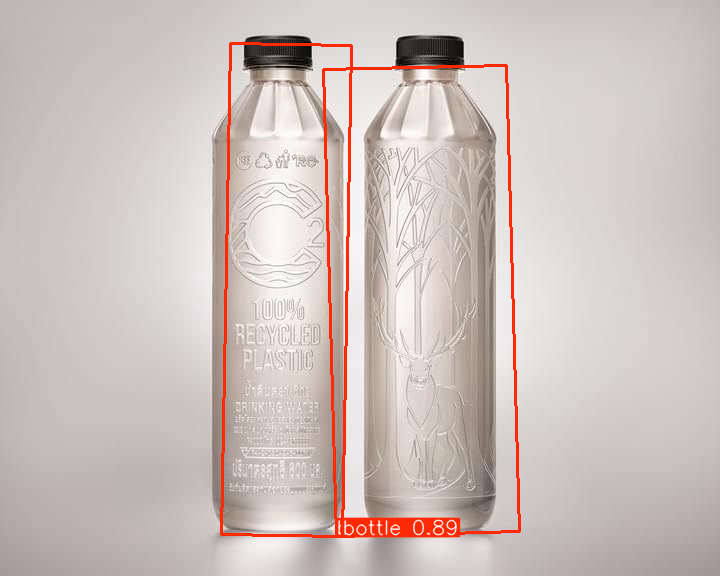

ผลลัพธ์ถูกบันทึกเป็นไฟล์ชื่อ: prediction_result.jpg


In [5]:
from ultralytics import YOLO
from PIL import Image
import os

# --- 1. โหลดโมเดลที่คุณเพิ่งเทรนเสร็จ ---
# แก้ Path ให้ตรงกับไฟล์ best.pt ของคุณ ลองเปลี่ยนการตั้งค่าแล้วรันดู 1 2 3 4 ....
#model_path = 'runs/obb/trash_obb_final_run_SGD_l_(6040)/weights/last.pt'
model_path = 'runs/obb/s__20_run/weights/best.pt'
model = YOLO(model_path)

# --- 2. ระบุรูปภาพที่ต้องการทดสอบ ---
# แก้ชื่อไฟล์ให้ตรงกับรูปที่คุณเตรียมไว้
#test_image_path = 'challenge/maxresdefault.jpg' 
test_image_path = 'challenge/IMG_3256.JPG' 

# --- 3. ทำการ Predict ---IMG_20250930_183243_571.jpg
results = model(test_image_path)

# --- 4. แสดงผลลัพธ์ ---
# ผลลัพธ์จะถูกเก็บอยู่ใน list results (ปกติจะมี 1 item สำหรับ 1 ภาพ)
res = results[0]

# แสดงภาพพร้อม Bounding Box ที่ทำนายได้
# PIL.Image.fromarray จะแปลงภาพจาก format ของ OpenCV (Numpy array) กลับเป็นภาพที่แสดงผลได้
# res.plot() คือฟังก์ชันที่วาด Bounding Box ลงบนภาพให้โดยอัตโนมัติ
res_plotted = res.plot()

# แสดงภาพใน Jupyter Notebook
display(Image.fromarray(res_plotted))

# (Optional) ถ้าต้องการเซฟไฟล์ภาพผลลัพธ์
output_filename = 'prediction_result.jpg'
res.save(filename=output_filename)
print(f"ผลลัพธ์ถูกบันทึกเป็นไฟล์ชื่อ: {output_filename}")